In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('preprocessedWithoutNans.csv')

In [4]:
df.shape


(24925, 13)

In [5]:
df["weighted_text"]= 10*(df['cleaned_headline']+" ")+ 4*(df['cleaned_short_description']+" ")+df["cleaned_article_text"]

In [6]:
df.shape

(24925, 14)

In [15]:
# Initialize the TF-IDF vectorizer
vectorizer_tf = TfidfVectorizer(max_features=5000) 

# Fit and transform the cleaned text, with a progress bar
# Using a custom approach since TfidfVectorizer does not support tqdm directly
tfidf_matrix = vectorizer_tf.fit_transform(df['weighted_text'])

# Convert the TF-IDF matrix to a DataFrame for better visualization (optional)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tf.get_feature_names_out())

# Display the first few rows of the TF-IDF DataFrame
tfidf_df.head()

,aaron,abandoned,abc,ability,able,abortion,abroad,absence,absolute,absolutely,...,young,younger,youngest,youth,youtube,zealand,zero,zika,zimmerman,zone
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.037671,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01715,0.024961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# tfidf_df.to_csv("tfidfFeatures_5000.csv")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sample preprocessed text data
documents =list(df['weighted_text'])


# Step 1: Create a document-term matrix (Bag of Words)
vectorizer = CountVectorizer()
doc_term_matrix = vectorizer.fit_transform(documents)

# Step 2: Apply LDA
lda_model = LatentDirichletAllocation(n_components=15, random_state=42)
lda_model.fit(doc_term_matrix)



In [21]:
# Step 3: Display the topics
top_k_words=15
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda_model.components_):
    print(f"Topic {idx}: {[terms[i] for i in topic.argsort()[:-top_k_words - 1:-1]]}")

Topic 0: ['game', 'you', 'team', 'sport', 'win', 'huffpost', 'year', 'olympic', 'athlete', 'first', 'olympics', 'free', 'player', 'nba', 'state']
Topic 1: ['trump', 'you', 'donald', 'president', 'huffpost', 'not', 'said', 'clinton', 'agreeing', 'republican', 'house', 'white', 'would', 'obama', 'also']
Topic 2: ['you', 'food', 'best', 'are', 'one', 'city', 'agreeing', 'also', 'wine', 'like', 'restaurant', 'new', 'world', 'hotel', 'drink']
Topic 3: ['you', 'day', 'travel', 'are', 'airline', 'agreeing', 'not', 'flight', 'also', 'huffpost', 'vacation', 'one', 'year', 'like', 'time']
Topic 4: ['recipe', 'you', 'make', 'water', 'are', 'agreeing', 'food', 'not', 'one', 'cooking', 'day', 'chocolate', 'egg', 'dish', 'cheese']
Topic 5: ['you', 'huffpost', 'player', 'nfl', 'year', 'team', 'cancer', 'free', 'football', 'support', 'like', 'help', 'first', 'super', 'said']
Topic 6: ['photo', 'you', 'style', 'week', 'fashion', 'look', 'new', 'show', 'agreeing', 'star', 'video', 'also', 'dress', 'are'

In [22]:
def get_dominant_topic(lda_model, vectorizer, article):
    vectorized_article = vectorizer.transform([article])
    topic_distribution = lda_model.transform(vectorized_article)
    return topic_distribution.argmax()

df['topic'] = df['weighted_text'].apply(lambda x: get_dominant_topic(lda_model,vectorizer,x))

In [27]:
df.head()

,Unnamed: 0.1,link,headline,category,short_description,authors,date,Index_Column,article_text,cleaned_article_text,cleaned_headline,cleaned_short_description,Unnamed: 0,weighted_text,topic
0,0,https://www.huffingtonpost.com/entry/marni-for...,Marni Mayhem: The Indignity of Shopping Fast F...,STYLE & BEAUTY,I am often mortified (post acquisition) at wha...,"Amy Tara Koch, Contributor\nAuthor, travel wri...",2012-03-12,0,"Author, travel writer and mom, lover of la dol...",author travel writer mom lover la dolce vita s...,marni mayhem indignity shopping fast fashion c...,often mortified post acquisition willwouldwill...,NaN,marni mayhem indignity shopping fast fashion c...,9
1,1,https://www.huffingtonpost.com/entry/star-wars...,These Incredible 3D Models Of Star Wars Land A...,ENTERTAINMENT,Disney has unveiled a detailed look at its new...,Matthew Jacobs,2017-07-14,1,"Senior Entertainment Reporter, HuffPost Here i...",senior entertainment reporter huffpost city cl...,incredible d model star war land hope,disney unveiled detailed look newest theme park,NaN,incredible d model star war land hope incredib...,11
2,2,https://www.huffingtonpost.com/entry/family-re...,5 Keys to Cutting Your Mental and Emotional Um...,WELLNESS,It is essential to recognize that these family...,"Judith Johnson, Contributor\nI am an author, m...",2012-05-24,2,"I am an author, mentor and speaker who helps o...",author mentor speaker help others raise consci...,key cutting mental emotional umbilical cord,essential recognize family role truth simply r...,NaN,key cutting mental emotional umbilical cord ...,8
3,3,https://www.huffingtonpost.com/entry/how-to-ma...,Cooking For Kitchenphobes: How To Make Vinaigr...,FOOD & DRINK,Throw out those bottled dressings. They're no ...,NaN,2013-02-28,3,Cooking For Kitchenphobes is a series aimed to...,cooking kitchenphobes series aimed put cooking...,cooking kitchenphobes make vinaigrette,throw bottled dressing they are good,NaN,cooking kitchenphobes make vinaigrette cooking...,4
4,4,https://www.huffingtonpost.com/entry/five-thin...,5 Things You Should Do Every Morning,WELLNESS,You can try these simple steps to keep your mo...,"Andrea Metcalf, Contributor\nHealthy Living, C...",2012-02-08,4,"Healthy Living, Certified Trainer, Author, Spe...",healthy living certified trainer author speake...,thing every morning,try simple step keep morning track start day h...,NaN,thing every morning thing every morning thi...,8


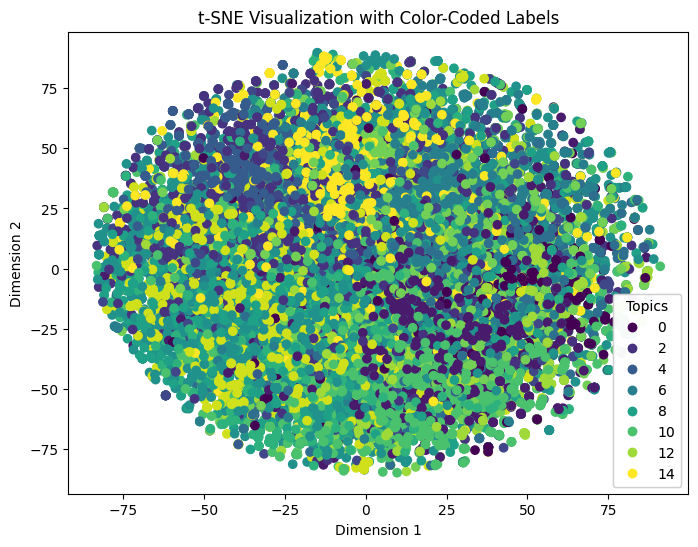

In [32]:
def plot_tsne(df):
    X = df.drop('topic', axis=1)

    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X)

    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(scaled_data)

    tsne_df = pd.DataFrame(tsne_result, columns=['dim1', 'dim2'])
    tsne_df['topic'] = df['topic']

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(tsne_df['dim1'], tsne_df['dim2'], c=pd.Categorical(tsne_df['topic']).codes, cmap='viridis')
    plt.title("t-SNE Visualization with Color-Coded Labels")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")

    legend = plt.legend(*scatter.legend_elements(), title="Topics")
    plt.gca().add_artist(legend)

    plt.show()



tfidf_df['topic']=df['topic']
plot_tsne(tfidf_df)

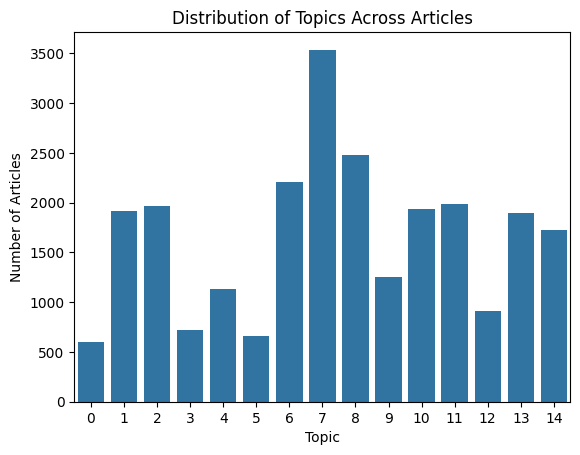

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

topic_counts = df['topic'].value_counts().sort_index()
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title('Distribution of Topics Across Articles')
plt.xlabel('Topic')
plt.ylabel('Number of Articles')
plt.show()



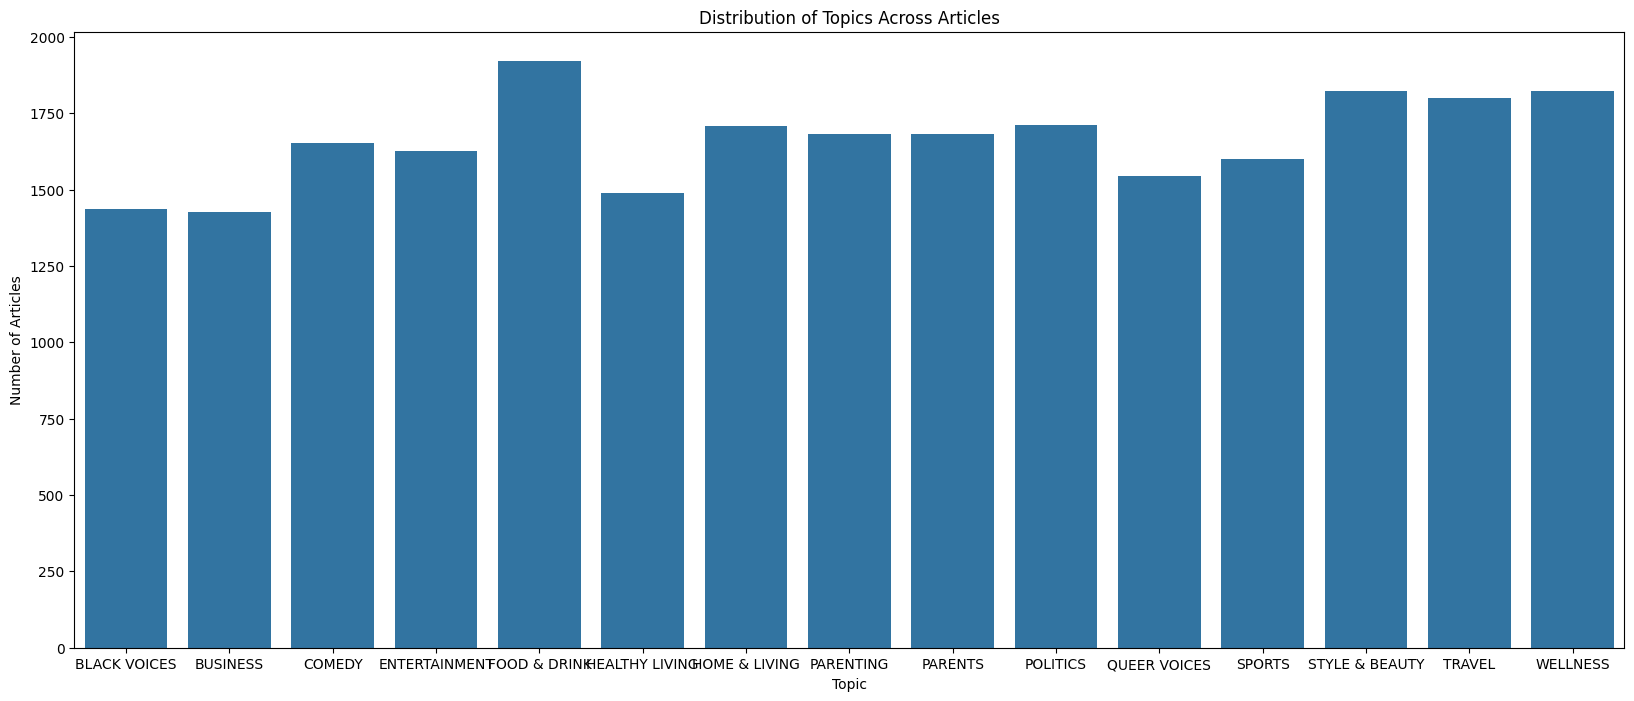

In [66]:
plt.figure(figsize=(20, 8))
topic_counts = df['category'].value_counts().sort_index()
sns.barplot(x=topic_counts.index, y=topic_counts.values)
plt.title('Distribution of Topics Across Articles')
plt.xlabel('Topic')
plt.ylabel('Number of Articles')
plt.show()


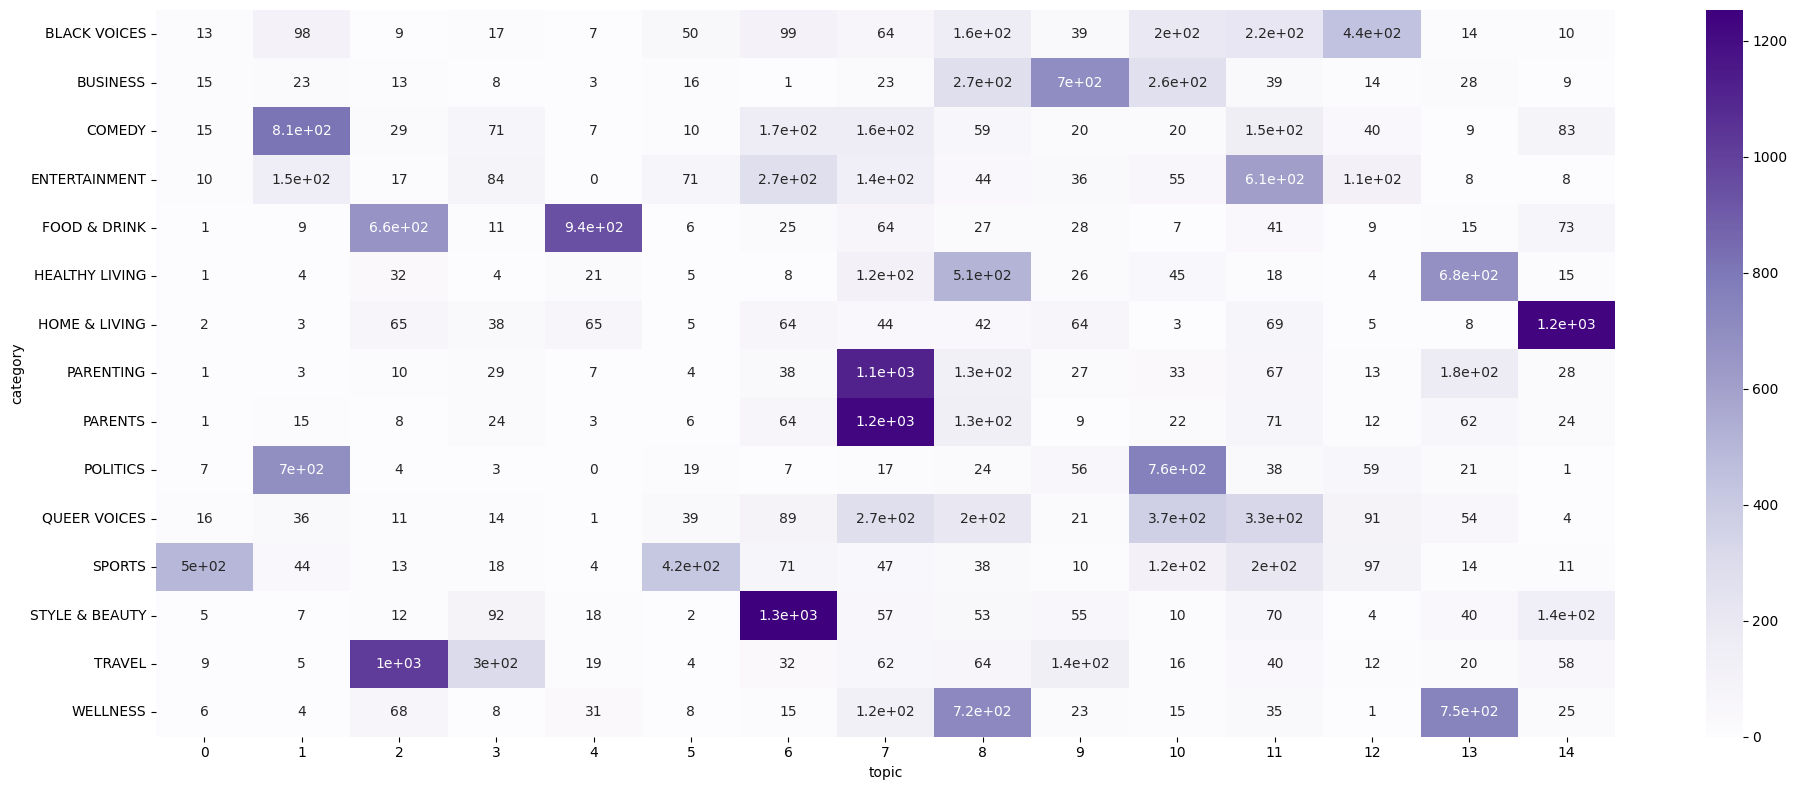

In [43]:
topic_category_dist = pd.crosstab(df['category'], df['topic'])
plt.figure(figsize=(20, 8))  
sns.heatmap(topic_category_dist, annot=True, cmap='Purples')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


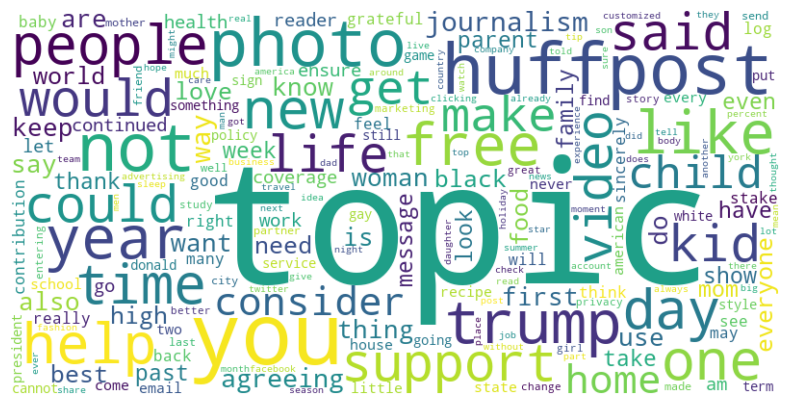

In [68]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


word_importance = tfidf_df.sum(axis=0)


word_freq_dict = dict(zip(tfidf_df.columns, word_importance))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.show()


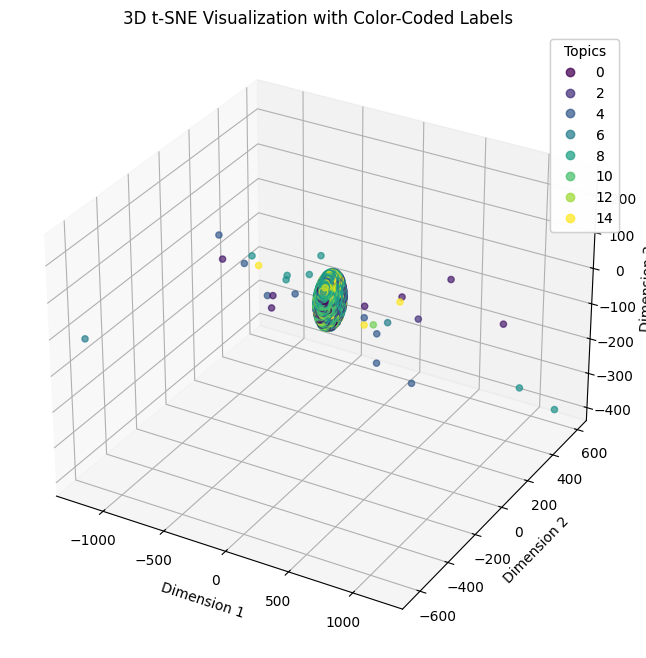

In [79]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_tsne_3d(df):
    X = df.drop('topic', axis=1)

    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(X)

    # Apply t-SNE
    tsne = TSNE(n_components=3, random_state=42)
    tsne_result = tsne.fit_transform(scaled_data)

    # Create a DataFrame for the t-SNE result
    tsne_df = pd.DataFrame(tsne_result, columns=['dim1', 'dim2', 'dim3'])
    tsne_df['topic'] = df['topic']

    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    scatter = ax.scatter(tsne_df['dim1'], tsne_df['dim2'], tsne_df['dim3'], 
                         c=pd.Categorical(tsne_df['topic']).codes, cmap='viridis', alpha=0.7)

    ax.set_title("3D t-SNE Visualization with Color-Coded Labels")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.set_zlabel("Dimension 3")

    # Create a legend
    legend = ax.legend(*scatter.legend_elements(), title="Topics")
    ax.add_artist(legend)

    plt.show()

# Make sure to call the function with your DataFrame
tfidf_df['topic'] = df['topic']
plot_tsne_3d(tfidf_df)
